Visualize the data from random runs projected onto the SRM space trained on the periodic runs.

In [1]:
import numpy as np
import hypertools as hyp
from os.path import join as pjoin
import matplotlib.pyplot as plt
import runpy
from scipy.signal import deconvolve
import seaborn as sns
from IPython.display import HTML

%matplotlib inline

In [2]:
sns.set_palette('colorblind')
sns.set_context('talk')

In [3]:
file_globals = runpy.run_path('srm_roi.py')
file_globals2 = runpy.run_path('decode_random_stimulation.py')
datagrabber = file_globals['datagrabber']
# load_data = file_globals['load_data']
grab_subject_ids = file_globals['grab_subject_ids']
make_periodic_labels =file_globals2['make_periodic_labels']
get_onsets_randomruns = file_globals2['get_onsets_randomruns']
randomruns_onsets_to_labels = file_globals2['randomruns_onsets_to_labels']

/data/project/somato/raw/venvs/somato_env/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [4]:
resdir = '/data/project/somato/scratch/project_random_stimulation'
dsdir = '/data/project/somato/scratch/dataset'

# get digit labels

In [5]:
periodic_labels_2d, periodic_labels_concat = make_periodic_labels()

In [6]:
subids = grab_subject_ids(ds_dir=dsdir, exclude_subs=('fip66'))
random_onsets = get_onsets_randomruns(subids, prepped_ds_dir=dsdir)
random_labels = randomruns_onsets_to_labels(random_onsets)
print(random_labels.shape)

subject ids : ['bmz426', 'clz082', 'oxi002', 'dgv970', 'yhx875', 'ben157', 'ulb827', 'ggx379', 'htr373', 'irh385', 'czg996', 'sul778', 'pdo804', 'aae961', 'npx529', 'tze824', 'zyr407', 'jlf001', 'kvv494', 'igf001', 'zmk890', 'oym138', 'guw502', 'nsu367', 'wtl296', 'sxp758', 'cqq680', 'mhc403', 'rev143']
(29, 2, 212)


# load results arrays

In [7]:
proj_respath = pjoin(resdir, 'proj_results.npy')
train_respath = pjoin(resdir, 'train_results.npy')

In [8]:
periodic_labels_2d.flatten().shape

(512,)

In [9]:
with open (train_respath, 'rb') as f:
    train_results = np.load(f)
    
# also reshape into two seperate runs
train_results_resh = train_results.reshape((29,10,2,256))

In [10]:
with open (proj_respath, 'rb') as f:
    proj_results = np.load(f)

In [11]:
print(train_results.shape)  # shape: nsubs, nfeatures, nvols_periodic
print(proj_results.shape)  # shape: nsubs, nruns, nfeatures, nvols_random

(29, 10, 512)
(29, 2, 10, 212)


# Check one or two trained models

In [12]:
subidx = 2

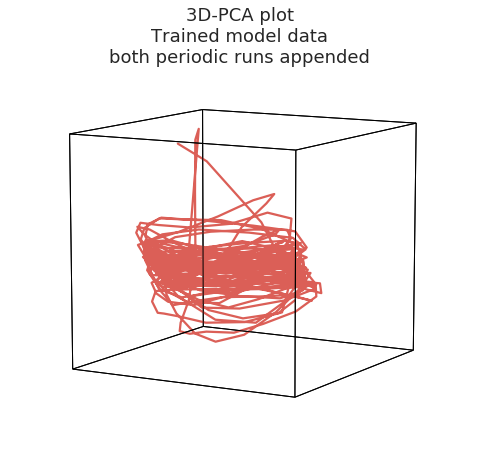

In [13]:
geom =hyp.plot(train_results[subidx].T,
         fmt='-',
         reduce='PCA', 
         title='3D-PCA plot\nTrained model data\nboth periodic runs appended', 
         size=(7,7))

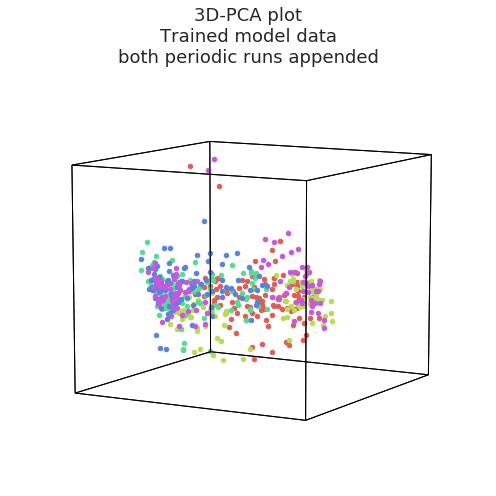

In [318]:
geom = hyp.plot(train_results[subidx].T,
         hue=periodic_labels_2d.flatten(),
         fmt='.',
         reduce='PCA', 
         title='3D-PCA plot\nTrained model data\nboth periodic runs appended', 
         size=(7,7))

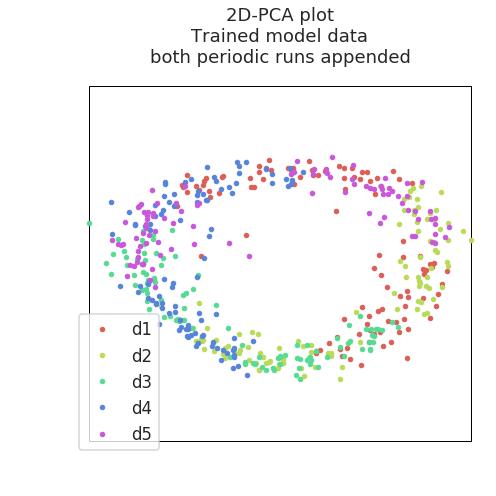

In [317]:
geom = hyp.plot(train_results[subidx].T, hue=periodic_labels_2d.flatten(), 
         fmt='.',
         reduce='PCA', 
         ndims=2,
         title='2D-PCA plot\nTrained model data\nboth periodic runs appended', 
         legend=['d%i' %i for i in range(1,6)],
         normalize=False,
         size=(7,7))

The model based on appended data from both periodic runs looks like an overlay of the two models from the individual runs.

In [20]:
train_results.shape

(29, 10, 512)

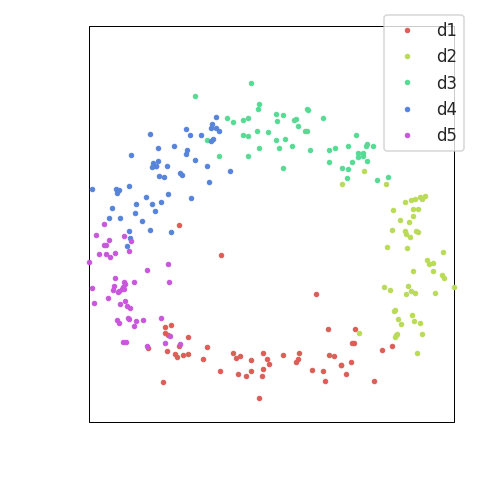

Object `geom.legend` not found.


In [30]:
geom = hyp.plot(train_results[subidx,:,:256].T, 
                hue=periodic_labels_2d.flatten()[:256], 
                 fmt='.',
                 reduce='PCA', 
                 ndims=2,
#                 title='Only first run', 
                 legend=['d%i' %i for i in range(1,6)],
                 save_path='run1_sub2_train_points_legend.png',
                 normalize=False,
                 size=(7,7))


In [250]:
train_results.shape

(29, 10, 512)

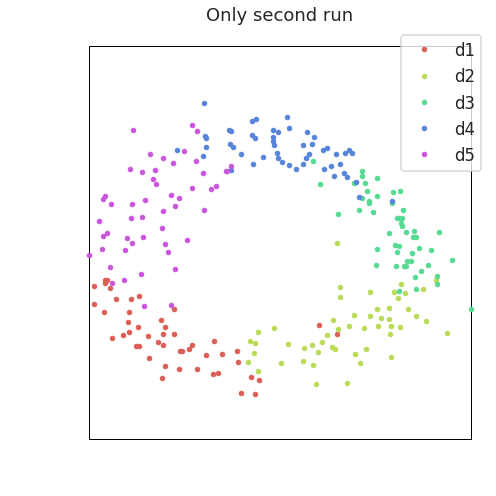

In [311]:
geom = hyp.plot(train_results[subidx,:,256:].T, hue=periodic_labels_2d.flatten()[256:], 
         fmt='.',
         reduce='PCA', 
         ndims=2,
         title='Only second run', 
         legend=['d%i' %i for i in range(1,6)],
         normalize=False,
         size=(7,7))

In [323]:
"""
# hyperalign both runs, turns out not to be very helpful
geom = hyp.plot([train_results_resh[subidx,0].T, train_results_resh[subidx,1].T], 
         fmt='.', 
         hue=periodic_labels_2d.flatten(), 
         reduce='PCA', 
         title='hyperaligned runs', 
         legend=['d%i' %i for i in range(1,6)],
         align=True,
         size=(8,8))
         
# tour through dimensions
for start_i in range(0,train_results.shape[1]-3):
    hyp.plot(train_results[0,start_i:start_i+3,:].T, fmt='-')#, hue=periodic_labels_2d.flatten())
"""
print()

Plot the trajectory through shared space (PCA & MDS)

In [324]:
geo = hyp.plot(train_results[subidx].T,
         fmt='-',
         reduce='PCA',
         title='3D-MDS plot\nTrained model data\nboth periodic runs appended', 
         size=(7,7),
         animate='parallel',
         frame_rate=10,
         tail_duration=1.,
         chemtrails=False,
               zoom=1.5,
               show=False)

anim = geo.line_ani
HTML(anim.to_html5_video())

# Check the projected data

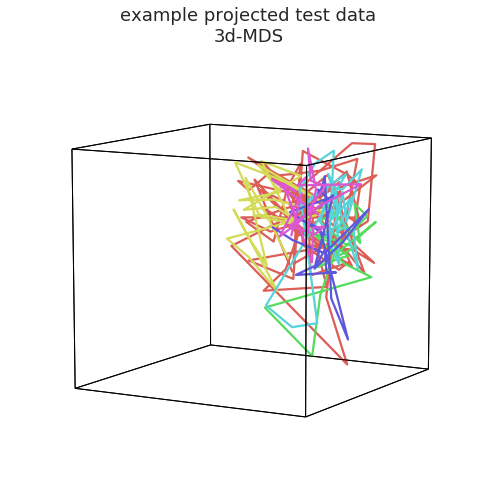

In [339]:
subidx, runidx = 1,0

geom = hyp.plot(np.nan_to_num(proj_results[subidx,runidx,:,:].T),
         hue=random_labels[subidx,runidx,:],
#         legend=['baseline' + 'd%i' %i for i in range(1,6)],
         title='example projected test data\n3d-MDS',
         reduce='MDS',
         size=(7,7))

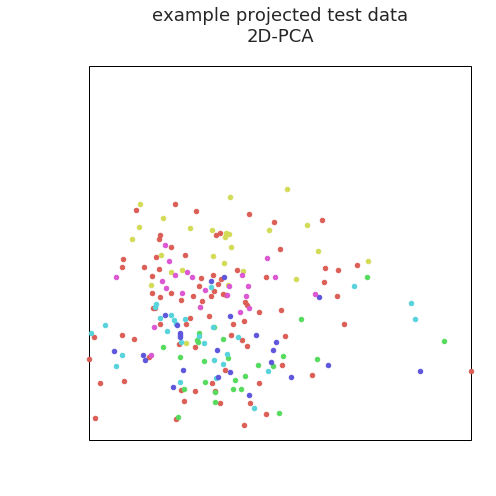

In [270]:
hyp.plot(np.nan_to_num(proj_results[subidx,runidx,:,:].T),
         hue=random_labels[subidx,runidx,:],
         fmt='.',
         #legend=['baseline' + 'd%i' %i for i in range(1,6)],
         title='example projected test data\n2D-PCA',
         reduce='PCA',
         ndims=2,
         size=(7,7))